In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from gglm.critic import Critic
from kernel.rect import KernelRect

%load_ext autoreload
%autoreload 2

In [2]:
npz = np.load('./fr_mismatch.npz')
t, stim, mask_spikes_te, u_spk_mean_te, mask_spikes_fr, u_spk_mean_fr  = npz['t'], npz['stim'], npz['mask_spikes_te'], npz['u_spk_mean_te'], npz['mask_spikes_fr'], npz['u_spk_mean_fr']
u_te, u_fr = npz['u_te'], npz['u_fr']
u0_ml, eta_vals_ml = npz['glm_u0'], npz['glm_eta']

mask_spikes = np.concatenate((mask_spikes_te, mask_spikes_fr), axis=1)
y = np.concatenate((np.ones(mask_spikes_te.shape[1]), np.zeros(mask_spikes_fr.shape[1])))
u = np.concatenate((u_te, u_fr), axis=1)

[   0  256  384  448  480  496  504  508  510  512  514  516  520  528
  544  576  640  768 1024] 1025
[   0  256  384  448  480  496  504  508  510  512  514  516  520  528
  544  576  640  768 1024] 1025
Starting gradient ascent... 

 Iteration 8 of 50 | Elapsed time: 0.18 seconds | objective=117120.5
 
 Iteration 8 of 50 | Converged | Elapsed time: 0.003 minutes | Log posterior is monotonic 

[   0  256  384  448  480  496  504  508  510  512  514  516  520  528
  544  576  640  768 1024] 1025


(array([15., 26., 23., 18.,  6.,  7.,  2.,  2.,  0.,  1.]),
 array([3287099.92040102, 3297930.99003406, 3308762.0596671 ,
        3319593.12930014, 3330424.19893318, 3341255.26856621,
        3352086.33819925, 3362917.40783229, 3373748.47746533,
        3384579.54709837, 3395410.61673141]),
 <a list of 10 Patch objects>)

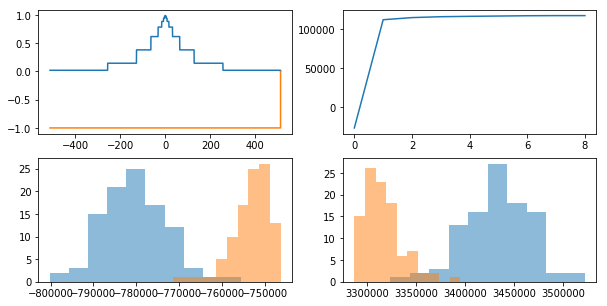

In [4]:
tbins = np.array([-512, -256, -128, -64, -32, -16, -8, -4, -2, 0, 2, 4, 8, 16, 32, 64, 128, 256, 512])
# tbins = np.array([0, 2, 4, 8, 16, 32, 64, 128, 256, 256 + 128, 512])
u_kernel = KernelRect(tbins, np.exp(-np.abs(tbins[1:] + tbins[:-1]) / 2 / 100))
critic = Critic(u_kernel.copy())
a = critic.transform(t, mask_spikes, u)

newton_kwargs = dict(max_iterations=50, learning_rate=1e-3, use_hessian=False, clip_theta=1)
optimizer = critic.fit(t, mask_spikes, u, y, newton_kwargs=newton_kwargs, verbose=True)
a_new = critic.transform(t, mask_spikes, u)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 5), nrows=2, ncols=2)
u_kernel.plot(ax=ax1)
critic.u_kernel.plot(ax=ax1)
ax2.plot(optimizer.obj_iterations)

ax3.hist(a[y==1], alpha=0.5)
ax3.hist(a[y==0], alpha=0.5)

ax4.hist(a_new[y==1], alpha=0.5)
ax4.hist(a_new[y==0], alpha=0.5)

(array([14., 22., 24., 19.,  6., 10.,  3.,  1.,  0.,  1.]),
 array([16342695.0865973 , 16395954.2750686 , 16449213.4635399 ,
        16502472.6520112 , 16555731.84048249, 16608991.02895379,
        16662250.21742509, 16715509.40589639, 16768768.59436769,
        16822027.78283899, 16875286.97131029]),
 <a list of 10 Patch objects>)

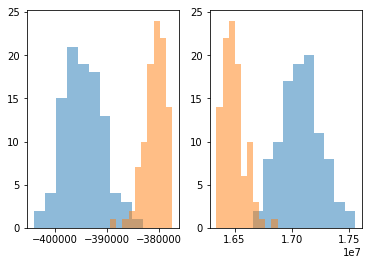

In [15]:
fig, (ax3, ax4) = plt.subplots(ncols=2)
